## Case:
As a data analyst working in the marketing analyst team at Cyclistic, a bike-share company. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand **how casual riders and annual members use Cyclistic bikes differently**. From these insights,
your team will design a **new marketing strategy to convert casual riders into annual members**. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

- Casual riders consist of customers that purchase single-ride or full-day passes.
- Annual members subscribe yearly for unlimited biking access.

### Scope:
1. Define and discuss the project(Ask)
2. Extract and prepare the data for exploration(Prepare)
3. Process the data for analysis(Process)
4. Conduct a descriptive analysis(Analyze)
5. Share key findings(Share)
6. Act on key findings(Act)

## Problem Statement

Cyclistic is faced with an uncertain future and is no longer able to solely rely on its traditional marketing strategies of raising general awareness and appealing to a variety of customer needs. In the interest of company growth, the director of marketing believes that Cyclistic should capitalize on the profit margins of annual subscribers by marketing to existing casual customers and converting them to become yearly subscribers. If that strategy is plausible, a well-executed marketing campaign may lead to more sustainable long-term revenue. To that end, we need to analyze how and **why Cyclistic casual bikers and members differ to weigh any evidence, opportunities, and barriers to any future marketing strategy**.

# Deliverable: Define and discuss the project

- 5,824 bicycles and 692 docking stations
- More than 50% of riders select traditional bikes
- 8% of riders opt for the assistive bike options
- 30% of users bike to commute to work each day
- Users are more likely to ride for leisure
- Casual riders have chosen Cyclistic for their mobility needs

# Deliverable: Prepare the data for exploration

## Preprocessing Scope

- Choosing a dataset, outlining the data's location and how it's organized
- Determining if the data meets analysis standards (ROCCC - Reliable, Original, Comprehensive, Current, and Credible)
- Verifying the data's integrity 
- Identifying how the data helps answer the questions being asked
- Filtering and sorting the data

## Data Source and Organization

The data we'll be using was extracted from (https://divvy-tripdata.s3.amazonaws.com/index.html. This data is made available by Motivate International Inc.

The data available to us consists of a repository made up primarily of quantitative measurements collected over time. Each data point represents a single bike trip from one docking station to the next.

Assuming that executives are unwilling to commit additional resources and time to collect more data, we will do our best with the data currently on hand.

We'll be examining a period of 12 months, from the start of June 2020 to the end of May 2021. Each month has a separate comma-separated value file with the same headings. Each record consists of a bike trip under the bike-sharing program composed of several features: a unique  ID serving as the table's primary key to identify each bike trip, the type of bike used, the type of customer (casual or member), details about the starting and ending docking station (name, ID, latitude, and longitude) and the DateTime for when the bike was picked up and dropped off.   

## Data Quality Assessment

- Reliable:

|Reliability issues|Description|
|:----------------:|:----------|
|Validity|Minimal constraints were imposed on formatting and range, resulting in issues like end datetimes starting before<br>start datetimes, stations having multiple ids, ids belonging to several stations, and formatting changes over time|
|Incomplete|7%% of records have one or more missing values|
|Duplicates|There are hundreds of duplicate primary keys, but each instance is unique|


- Original: 

The data was sourced by a first-party group (motivate international inc.) using their resources without any third-party intervention.

- Comprehensiveness:

This data set is comprehensive enough for our inquiry and is mostly free of human error.

- Current:

The time frame we're examining gives us an up-to-date view (as of the time this study was written).

- Vetted:

Based on our initial investigations, most recorded bike trips are accurate and free of any notable errors.

## Ethical Concerns

- Security: The data is in a cloud repository that is managed by authorized Motivate employees and is secure by a trusted and well known global cloud services provider.

- Accessibility: All of Cyclistic's bike ride records are open to the public with minimal constraint

- Privacy: Data does not contain any private information

- Credibility: The data is based on fact and no manual intervention visibile at first glance.


## Data Purpose 

To discover trends and actionable insights that reveal how Cyclistic bikes are used by different user types.


## Assumptions:

We assume that the data collection process was accomplished with integrity. Furthermore, we move forward with this analysis under the assumption that the data is free of any glaring inaccuracies, bias, and credibility issues. We also assume that the original repository has never been accessed or modified in an unauthorized manner. 

In [17]:
#Loading required libraries for data handling, viz,formatiing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#As we have 12 months of data getting the data into seperate data frames. Later we might combine them for proper analysis
june_2020_df = pd.read_csv("./data/202006-divvy-tripdata.csv")
july_2020_df = pd.read_csv("./data/202007-divvy-tripdata.csv")
august_2020_df = pd.read_csv("./data/202008-divvy-tripdata.csv")
september_2020_df = pd.read_csv("./data/202009-divvy-tripdata.csv")
october_2020_df = pd.read_csv("./data/202010-divvy-tripdata.csv")
november_2020_df = pd.read_csv("./data/202011-divvy-tripdata.csv")
december_2020_df = pd.read_csv("./data/202012-divvy-tripdata.csv")
january_2021_df = pd.read_csv("./data/202101-divvy-tripdata.csv")
february_2021_df = pd.read_csv("./data/202102-divvy-tripdata.csv")
march_2021_df = pd.read_csv("./data/202103-divvy-tripdata.csv")
april_2021_df = pd.read_csv("./data/202104-divvy-tripdata.csv")
may_2021_df = pd.read_csv("./data/202105-divvy-tripdata.csv")

In [3]:
frames = [
    june_2020_df,
    july_2020_df,
    august_2020_df,
    september_2020_df,
    october_2020_df,
    november_2020_df,
    december_2020_df,
    january_2021_df,
    february_2021_df,
    march_2021_df,
    april_2021_df,
    may_2021_df,
]

### Check number of columns for all the dataframes
### This step is necessary as it informs whether and how the dataframes can be joined. If there are diffenece in number of columns we might have to make the similar.

In [4]:
num_cols = []


def verify_num_of_cols(frames):
    for frame in frames:
        num_cols.append(len(frame.columns))
    return num_cols

print(verify_num_of_cols(frames=frames))
# Here, we establish that each dataframe has 13 columns
# By inspecting the columns manually, we discover that they are appropriately named
# across the dataframes

# Create a single dataframe that combines the 12 dataframes
df = pd.concat(frames, axis=0, ignore_index=True)
print(df.columns)

[13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [5]:
# Summary of the data
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,8CD5DE2C2B6C4CFC,docked_bike,2020-06-13 23:24:48,2020-06-13 23:36:55,Wilton Ave & Belmont Ave,117,Damen Ave & Clybourn Ave,163.0,41.940180,-87.653040,41.931931,-87.677856,casual
1,9A191EB2C751D85D,docked_bike,2020-06-26 07:26:10,2020-06-26 07:31:58,Federal St & Polk St,41,Daley Center Plaza,81.0,41.872077,-87.629543,41.884241,-87.629634,member
2,F37D14B0B5659BCF,docked_bike,2020-06-23 17:12:41,2020-06-23 17:21:14,Daley Center Plaza,81,State St & Harrison St,5.0,41.884241,-87.629634,41.874053,-87.627716,member
3,C41237B506E85FA1,docked_bike,2020-06-20 01:09:35,2020-06-20 01:28:24,Broadway & Cornelia Ave,303,Broadway & Berwyn Ave,294.0,41.945529,-87.646439,41.978353,-87.659753,casual
4,4B51B3B0BDA7787C,docked_bike,2020-06-25 16:59:25,2020-06-25 17:08:48,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117.0,41.921540,-87.653818,41.940180,-87.653040,casual
5,D50DF288196B53BE,docked_bike,2020-06-17 18:07:18,2020-06-17 18:18:14,Sheffield Ave & Webster Ave,327,Wilton Ave & Belmont Ave,117.0,41.921540,-87.653818,41.940180,-87.653040,casual
6,165FA6D223E58600,docked_bike,2020-06-25 07:24:33,2020-06-25 07:31:11,Federal St & Polk St,41,Daley Center Plaza,81.0,41.872077,-87.629543,41.884241,-87.629634,member
7,D8236CFC050E591C,docked_bike,2020-06-19 00:00:56,2020-06-19 00:09:15,Sheffield Ave & Wellington Ave,115,Broadway & Cornelia Ave,303.0,41.936266,-87.652662,41.945529,-87.646439,casual
8,9D82B9B53C37C55C,docked_bike,2020-06-30 12:11:36,2020-06-30 12:32:43,Calumet Ave & 18th St,338,Franklin St & Lake St,164.0,41.857611,-87.619407,41.885837,-87.635500,member
9,3DFF4AB10A6895A3,docked_bike,2020-06-28 14:17:09,2020-06-28 14:27:51,Milwaukee Ave & Grand Ave,84,Wells St & Huron St,53.0,41.891578,-87.648384,41.894722,-87.634362,member


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4073561 entries, 0 to 4073560
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 404.0+ MB
None


#### We have 13 columns and we can infer their content:
1. ride_id: Id for each trip taken, as of now we are not sure if they are unique or not, we have to find out
2. rideable_type: Represents the type of a bike
3. started_at: Date and time of the start time
4. ended_at: Date and time of the end time
5. start_station_name: Name of the starting station
6. start_station_id: Id of the starting station
7. end_station_name: Name of the ending station
8. end_station_id: Id of the ending station
9. start_lat: Latitude of the starting point
10. start_lng: Longitude of the starting point
11. end_lat: Latitude of the ending point
12. end_lng: Longitude of the ending point
13. member_casual: Represents the membership status'''

# DATA CLEANING

In [7]:
# First we need to establish which columns and rows have missing data
# Columns with missing values
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    201975
start_station_id      202601
end_station_name      229190
end_station_id        229651
start_lat                  0
start_lng                  0
end_lat                 5037
end_lng                 5037
member_casual              0
dtype: int64

In [8]:
# Rows missing values
df[df.isnull().any(axis=1)]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
800,8F5DC3FE5B22E480,docked_bike,2020-06-04 07:24:22,2020-06-04 07:58:23,Broadway & Cornelia Ave,303,NaN,NaN,41.945529,-87.646439,NaN,NaN,member
1266,9358687FAE5EEC17,docked_bike,2020-06-28 13:58:51,2020-06-28 18:23:31,Michigan Ave & Lake St,52,NaN,NaN,41.886024,-87.624117,NaN,NaN,casual
2354,5399B46884E18D40,docked_bike,2020-06-21 19:08:51,2020-06-21 20:28:05,Michigan Ave & Lake St,52,NaN,NaN,41.886024,-87.624117,NaN,NaN,member
2492,EA8792DAAD74C5DA,docked_bike,2020-06-04 08:46:31,2020-06-04 10:09:18,Indiana Ave & Roosevelt Rd,255,NaN,NaN,41.867888,-87.623041,NaN,NaN,casual
2957,69D0294D7C1727E8,docked_bike,2020-06-17 09:51:33,2020-06-17 10:18:26,Clarendon Ave & Junior Ter,245,NaN,NaN,41.961004,-87.649603,NaN,NaN,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073554,A87018C1286BE8FC,electric_bike,2021-05-11 22:46:53,2021-05-11 22:51:22,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961660,-87.654696,41.95,-87.65,member
4073555,D0B8E59E2B3C406D,electric_bike,2021-05-02 17:48:17,2021-05-02 17:52:19,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802586,-87.590306,41.80,-87.60,member
4073556,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.80,-87.60,member
4073558,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.95,-87.65,member


In [9]:
# Examine the first row with missing values further
print(df.iloc[800])

ride_id                      8F5DC3FE5B22E480
rideable_type                     docked_bike
started_at                2020-06-04 07:24:22
ended_at                  2020-06-04 07:58:23
start_station_name    Broadway & Cornelia Ave
start_station_id                          303
end_station_name                          NaN
end_station_id                            NaN
start_lat                           41.945529
start_lng                          -87.646439
end_lat                                   NaN
end_lng                                   NaN
member_casual                          member
Name: 800, dtype: object


In [10]:
sum_of_rows_with_null_values = df.isnull().any(axis=1).sum()
print(f"Total Null rows: {sum_of_rows_with_null_values}")

Total Null rows: 314299


In [11]:
# Percentage of rows with missing values in the dataset
pc_nan_rows = sum_of_rows_with_null_values / df.shape[0] * 100
print(f"PC of null rows: {pc_nan_rows}")

PC of null rows: 7.715583490709971


In [12]:
# Drop rows with missing data
# Since rows with missing data appear to contain more than one missing value and
# only account for 7.7% of the dataset, we drop them.
# We do not drop the columns because they have less than 5% missing values

clean_df = df.dropna(axis="index")


In [13]:
# Check if new df has any missing values
# This step confirms that the data has no missing values
print(clean_df.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [14]:
# Check if any ID's are duplicate
total_duplicate_rows = clean_df.duplicated().sum()
print(f"Duplicate rows: {total_duplicate_rows}")

Duplicate rows: 0


In [15]:
print(clean_df.head(5))
print(clean_df.info())

            ride_id rideable_type           started_at             ended_at  \
0  8CD5DE2C2B6C4CFC   docked_bike  2020-06-13 23:24:48  2020-06-13 23:36:55   
1  9A191EB2C751D85D   docked_bike  2020-06-26 07:26:10  2020-06-26 07:31:58   
2  F37D14B0B5659BCF   docked_bike  2020-06-23 17:12:41  2020-06-23 17:21:14   
3  C41237B506E85FA1   docked_bike  2020-06-20 01:09:35  2020-06-20 01:28:24   
4  4B51B3B0BDA7787C   docked_bike  2020-06-25 16:59:25  2020-06-25 17:08:48   

            start_station_name start_station_id          end_station_name  \
0     Wilton Ave & Belmont Ave              117  Damen Ave & Clybourn Ave   
1         Federal St & Polk St               41        Daley Center Plaza   
2           Daley Center Plaza               81    State St & Harrison St   
3      Broadway & Cornelia Ave              303     Broadway & Berwyn Ave   
4  Sheffield Ave & Webster Ave              327  Wilton Ave & Belmont Ave   

  end_station_id  start_lat  start_lng    end_lat    end_lng m

# PROCESS DATA

In [18]:
pd.options.mode.chained_assignment = None

In [19]:
# transform started_at and ended_at into datetime
clean_df["started_at"] = pd.to_datetime(clean_df["started_at"])
clean_df["ended_at"] = pd.to_datetime(clean_df["ended_at"])

In [20]:
# Sort dataframe in descending order based on ended_at column
clean_df.sort_values(by=["ended_at"], inplace=True, ascending=False)
print(clean_df)

                  ride_id rideable_type          started_at  \
3720412  C4896415C76C8463   docked_bike 2021-05-23 17:41:59   
3732002  583824DCF443DD0B   docked_bike 2021-05-30 13:28:44   
3949186  B304E261D019812E   docked_bike 2021-05-30 23:25:08   
3721215  1073DF51476BB423   docked_bike 2021-05-21 13:56:08   
3588249  BDA1217EC8532C7B   docked_bike 2021-05-02 02:56:07   
...                   ...           ...                 ...   
93748    4AFF9415DF507565   docked_bike 2020-06-03 06:00:21   
128222   90058C0761C4E45F   docked_bike 2020-06-03 06:00:14   
34902    E771D6B798F54371   docked_bike 2020-06-03 05:59:59   
26101    742C8A708C5D94FE   docked_bike 2020-06-03 06:03:42   
294147   B29C30CFA0072B25   docked_bike 2020-06-03 06:00:12   

                   ended_at               start_station_name start_station_id  \
3720412 2021-06-10 22:17:11                  Millennium Park            13008   
3732002 2021-06-10 16:10:13               Clark St & Lake St     KA1503000012   


In [21]:
# From above, we notice that the dataframe contains some data for June 2021.
# Below we remove june 2021 data so that months = 12

june_2021_filter = df["ended_at"] <= "2021-06-03 00:00:00"
clean_df = clean_df[june_2021_filter]


In [22]:
# Create ride_length column (ride_length is in minutes)
ride_length = clean_df["ended_at"] - clean_df["started_at"]
ride_length = np.round(ride_length.dt.total_seconds() / 60, 2)
clean_df["ride_length"] = ride_length

In [23]:
# day_of_week
# This colum will contain the day of the week a ride started
clean_df["day_of_week"] = clean_df["started_at"].dt.day_name()

In [24]:
# month columns
clean_df["month"] = pd.DatetimeIndex(clean_df["started_at"]).month
clean_df["month_name"] = clean_df["started_at"].dt.strftime("%b")
print(clean_df)

                  ride_id rideable_type          started_at  \
3995160  A395D6C9A3DF99CB   docked_bike 2021-05-30 13:28:35   
3837429  FDE3A0BDFBBEF2D3   docked_bike 2021-05-31 13:23:00   
3930954  4714FB84FAA2FCB2   docked_bike 2021-05-30 15:49:20   
3770334  4C1F7EC575F92A86   docked_bike 2021-05-30 15:16:43   
3564026  FD95EAA51634E6AD   docked_bike 2021-05-30 13:38:24   
...                   ...           ...                 ...   
93748    4AFF9415DF507565   docked_bike 2020-06-03 06:00:21   
128222   90058C0761C4E45F   docked_bike 2020-06-03 06:00:14   
34902    E771D6B798F54371   docked_bike 2020-06-03 05:59:59   
26101    742C8A708C5D94FE   docked_bike 2020-06-03 06:03:42   
294147   B29C30CFA0072B25   docked_bike 2020-06-03 06:00:12   

                   ended_at         start_station_name start_station_id  \
3995160 2021-06-02 23:25:59         Clark St & Lake St     KA1503000012   
3837429 2021-06-02 22:03:08            Millennium Park            13008   
3930954 2021-06-02

In [25]:
# Get a summary of the data
data_descrption = clean_df.describe()
print(data_descrption)

          start_lat     start_lng       end_lat       end_lng   ride_length  \
count  3.759235e+06  3.759235e+06  3.759235e+06  3.759235e+06  3.759235e+06   
mean   4.190430e+01 -8.764374e+01  4.190458e+01 -8.764402e+01  2.450574e+01   
std    4.144593e-02  2.413830e-02  4.154276e-02  2.426557e-02  3.543237e+02   
min    4.164850e+01 -8.777470e+01  4.164850e+01 -8.777470e+01 -2.904997e+04   
25%    4.188266e+01 -8.765653e+01  4.188283e+01 -8.765695e+01  7.820000e+00   
50%    4.189897e+01 -8.763990e+01  4.189964e+01 -8.764107e+01  1.422000e+01   
75%    4.192947e+01 -8.762761e+01  4.192955e+01 -8.762769e+01  2.615000e+01   
max    4.206489e+01 -8.752823e+01  4.206501e+01 -8.752452e+01  5.428335e+04   

              month  
count  3.759235e+06  
mean   7.109070e+00  
std    2.539002e+00  
min    1.000000e+00  
25%    5.000000e+00  
50%    7.000000e+00  
75%    9.000000e+00  
max    1.200000e+01  


In [26]:
# From this summary:
# We note that there are some negative values  for ride length
# Below we take a better look at them

neg_ride_length = clean_df[clean_df["ride_length"] < 0]
print(f"Rows with negative ride length value {neg_ride_length}")

Rows with negative ride length value                   ride_id  rideable_type          started_at  \
3855059  3EC1B5A4D4B9AB99   classic_bike 2021-05-05 16:10:04   
3497376  318DD838369AEA61   classic_bike 2021-04-30 10:56:32   
3497264  6E81034B446FC2FD  electric_bike 2021-04-23 09:43:39   
3497731  8ADD13BD8F6A7567   classic_bike 2021-04-17 12:43:36   
3227059  BC53ECCBC76278FD   classic_bike 2021-04-07 16:11:33   
...                   ...            ...                 ...   
51866    1DB151399AF9CD21    docked_bike 2020-06-03 10:50:40   
52149    BA20A3E54DDB643B    docked_bike 2020-06-03 10:18:43   
70962    380583B1980964E2    docked_bike 2020-06-03 09:56:40   
79997    B74D4FD4D24FA6E2    docked_bike 2020-06-03 09:54:56   
250389   A578E6884FEF2972    docked_bike 2020-06-03 09:53:40   

                   ended_at              start_station_name start_station_id  \
3855059 2021-05-05 16:09:51           Dayton St & North Ave            13058   
3497376 2021-04-30 10:56:30       

In [27]:

# 10k rows have negative values - we filter them out
clean_df = clean_df[clean_df["ride_length"] > 0]


# ANALYZE DATA

In [28]:
# SUMMARY
data_descrption = clean_df.describe()
print(data_descrption)

          start_lat     start_lng       end_lat       end_lng   ride_length  \
count  3.748706e+06  3.748706e+06  3.748706e+06  3.748706e+06  3.748706e+06   
mean   4.190429e+01 -8.764375e+01  4.190458e+01 -8.764402e+01  2.698052e+01   
std    4.145382e-02  2.414443e-02  4.154821e-02  2.427042e-02  2.388391e+02   
min    4.164850e+01 -8.777470e+01  4.164850e+01 -8.777470e+01  2.000000e-02   
25%    4.188266e+01 -8.765663e+01  4.188283e+01 -8.765695e+01  7.870000e+00   
50%    4.189897e+01 -8.763998e+01  4.189964e+01 -8.764107e+01  1.427000e+01   
75%    4.192947e+01 -8.762763e+01  4.192955e+01 -8.762769e+01  2.620000e+01   
max    4.206489e+01 -8.752823e+01  4.206501e+01 -8.752452e+01  5.428335e+04   

              month  
count  3.748706e+06  
mean   7.104646e+00  
std    2.539981e+00  
min    1.000000e+00  
25%    5.000000e+00  
50%    7.000000e+00  
75%    9.000000e+00  
max    1.200000e+01  


In [29]:
# From the new summary:
# The average ride_length is 26.98 minutes
# The minimum ride length is 1.2 seconds
# The maximum ride length is 904.72hours, approxiamately 38days

In [30]:
# TOTAL NUMBER OF RIDERS PER CATEGORY

total_riders = clean_df["member_casual"].value_counts()
print(f"Number of riders per category \n {total_riders}")

Number of riders per category 
 member    2173843
casual    1574863
Name: member_casual, dtype: int64


In [31]:
# Confirm the total number of bike-share riders
total_riders_using_id = clean_df.groupby(["member_casual"])["ride_id"].count()
print(f"Total riders using ride_id \n {total_riders_using_id}")

Total riders using ride_id 
 member_casual
casual    1574863
member    2173843
Name: ride_id, dtype: int64


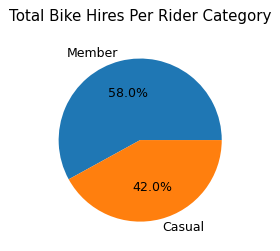

In [32]:
# Pie chart to show riders per category
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)
labels = ["Member", "Casual"]
plt.pie(x=total_riders, autopct="%.1f%%", labels=labels)
ax.set_title("Total Bike Hires Per Rider Category", pad=14, loc="center")
plt.show()


In [33]:
ride_hires_per_month = (
    clean_df["month"]
    .value_counts(sort=False)
    .rename_axis("Month")
    .reset_index(name="Total Hires")
)

months = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
print(ride_hires_per_month)

    Month  Total Hires
0       5       450951
1       4       298199
2       3       205687
3       2        42994
4       1        83508
5      12       113539
6      11       221916
7      10       337375
8       9       498228
9       8       605652
10      7       548617
11      6       342040


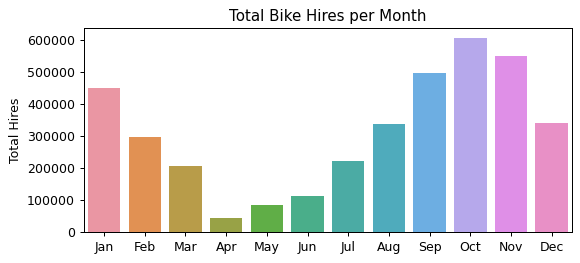

In [37]:
plt.figure(figsize=(7, 3),dpi=90)
plt.title("Total Bike Hires per Month")
sns.barplot(data=ride_hires_per_month, x=months, y="Total Hires")
plt.show()


In [36]:
# Find out what days of the week have the most bike hires

ride_hires_per_day = (
    clean_df["day_of_week"]
    .value_counts()
    .rename_axis("Day")
    .reset_index(name="Total Hires")
)
ride_hires_per_day.sort_values(by=["Total Hires"], inplace=True, ascending=True)
print(ride_hires_per_day)

         Day  Total Hires
6     Monday       462927
5    Tuesday       464319
4  Wednesday       488583
3   Thursday       491949
2     Friday       549151
1     Sunday       591228
0   Saturday       700549


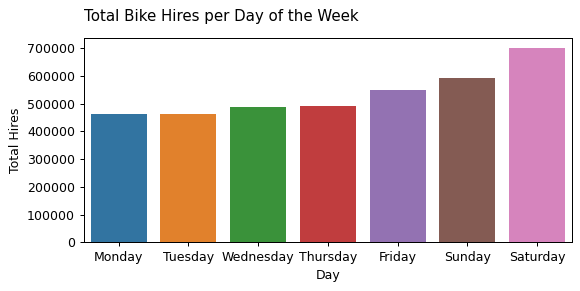

In [41]:
plt.figure(figsize=(7, 3), dpi=90)
plt.title("Total Bike Hires per Day of the Week", loc="left", pad=14)
sns.barplot(data=ride_hires_per_day, x="Day", y="Total Hires")
plt.show()

In [38]:
monthly_bike_hires_per_customer_category = clean_df.groupby(["member_casual"])[
    "month_name"
].value_counts(sort=True)

In [39]:
monthly_casual_member_df = pd.DataFrame()
monthly_casual_member_df["casual"] = monthly_bike_hires_per_customer_category["casual"]
monthly_casual_member_df["member"] = monthly_bike_hires_per_customer_category["member"]
monthly_casual_member_df["Month"] = monthly_casual_member_df.index

In [40]:
print(monthly_casual_member_df)

            casual  member Month
month_name                      
Aug         281945  323707   Aug
Jul         268103  280514   Jul
May         216796  234155   May
Sep         214672  283556   Sep
Jun         154329  187711   Jun
Oct         122317  215058   Oct
Apr         120418  177781   Apr
Mar          75641  130046   Mar
Nov          72847  149069   Nov
Dec          24492   89047   Dec
Jan          14690   68818   Jan
Feb           8613   34381   Feb


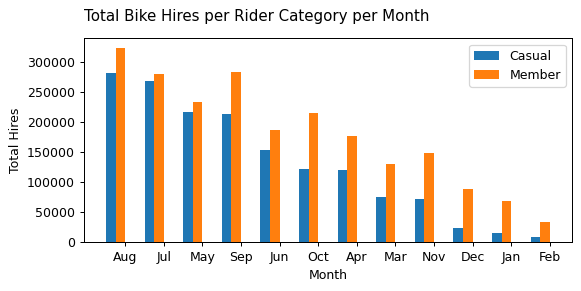

In [41]:
pos = list(range(len(monthly_casual_member_df["casual"])))
width = 0.25

fig, ax = plt.subplots(figsize=(7, 3), dpi=90)
plt.bar(pos, monthly_casual_member_df["casual"], width)
plt.bar([p + width for p in pos], monthly_casual_member_df["member"], width)

# Setting the y and x axis label
ax.set_ylabel("Total Hires")
ax.set_xlabel("Month")
# Setting the chart's title
ax.set_title("Total Bike Hires per Rider Category per Month", loc="left", pad=14)

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(monthly_casual_member_df["Month"])

# Adding the legend and showing the plot
plt.legend(["Casual", "Member"], loc="upper right")
plt.show()

In [42]:
# BIKE HIRES PER CATEGORY PER DAY
# Find out how ridership compares everyday for the two rider categories

bike_hires_per_customer_category = clean_df.groupby(["member_casual"])[
    "day_of_week"
].value_counts(sort=True)
print(bike_hires_per_customer_category)

casual_member_df = pd.DataFrame()
casual_member_df["casual"] = bike_hires_per_customer_category["casual"]
casual_member_df["member"] = bike_hires_per_customer_category["member"]
casual_member_df["Day"] = casual_member_df.index

print(casual_member_df)

member_casual  day_of_week
casual         Saturday       368606
               Sunday         307081
               Friday         225954
               Thursday       175347
               Monday         171911
               Wednesday      166643
               Tuesday        159321
member         Saturday       331943
               Friday         323197
               Wednesday      321940
               Thursday       316602
               Tuesday        304998
               Monday         291016
               Sunday         284147
Name: day_of_week, dtype: int64
             casual  member        Day
day_of_week                           
Saturday     368606  331943   Saturday
Sunday       307081  284147     Sunday
Friday       225954  323197     Friday
Thursday     175347  316602   Thursday
Monday       171911  291016     Monday
Wednesday    166643  321940  Wednesday
Tuesday      159321  304998    Tuesday


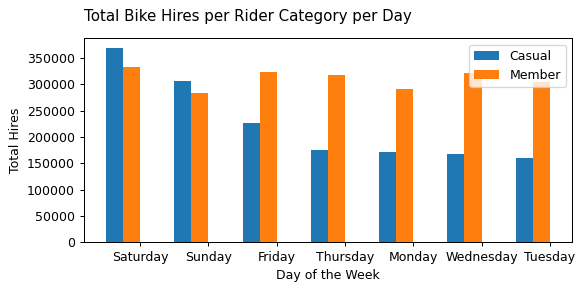

In [43]:


pos = list(range(len(casual_member_df["casual"])))
width = 0.25

fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

plt.bar(pos, casual_member_df["casual"], width)
plt.bar([p + width for p in pos], casual_member_df["member"], width)
# Setting the y and x axis label
ax.set_ylabel("Total Hires")
ax.set_xlabel("Day of the Week")
# Setting the chart's title
ax.set_title("Total Bike Hires per Rider Category per Day", loc="left", pad=14)

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(casual_member_df["Day"])

# Adding the legend and showing the plot
plt.legend(["Casual", "Member"], loc="upper right")
plt.show()

The average ride length per category member_casual
casual    43.125897
member    15.283834
Name: ride_length, dtype: float64


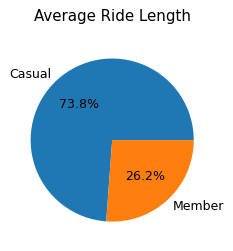

In [44]:
# AVERAGE RIDE LENGTH PER CATEGORY

average_ride_length = clean_df.groupby(["member_casual"])["ride_length"].mean()
print(f"The average ride length per category {average_ride_length}")

fig, ax = plt.subplots(figsize=(7, 3), dpi=90)
labels = ["Casual", "Member"]
plt.pie(x=average_ride_length, autopct="%.1f%%", labels=labels)
ax.set_title("Average Ride Length", pad=14, loc="center")
plt.show()

In [45]:
# AVERAGE RIDE LENGTH FOR RIDERS BY DAY OF THE WEEK

average_daily_ride_length = clean_df.groupby(["member_casual", "day_of_week"])[
    "ride_length"
].mean()
print(f"Average ride lenth per category per day {average_daily_ride_length}")

weekly_average_ride_length_df = pd.DataFrame()

weekly_average_ride_length_df["casual"] = average_daily_ride_length["casual"]
weekly_average_ride_length_df["member"] = average_daily_ride_length["member"]
weekly_average_ride_length_df["Day"] = weekly_average_ride_length_df.index

print(weekly_average_ride_length_df)


Average ride lenth per category per day member_casual  day_of_week
casual         Friday         40.905779
               Monday         42.544579
               Saturday       44.983449
               Sunday         48.932042
               Thursday       40.516494
               Tuesday        38.563561
               Wednesday      39.035381
member         Friday         14.914049
               Monday         14.606788
               Saturday       16.836476
               Sunday         17.344367
               Thursday       14.423968
               Tuesday        14.399816
               Wednesday      14.530654
Name: ride_length, dtype: float64
                casual     member        Day
day_of_week                                 
Friday       40.905779  14.914049     Friday
Monday       42.544579  14.606788     Monday
Saturday     44.983449  16.836476   Saturday
Sunday       48.932042  17.344367     Sunday
Thursday     40.516494  14.423968   Thursday
Tuesday      38.563561  

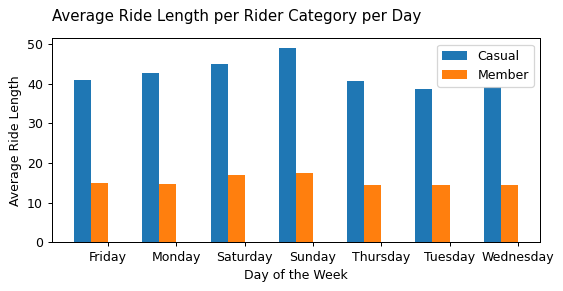

In [46]:
pos = list(range(len(weekly_average_ride_length_df["casual"])))
width = 0.25

fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

plt.bar(pos, weekly_average_ride_length_df["casual"], width)
plt.bar([p + width for p in pos], weekly_average_ride_length_df["member"], width)

# Setting the y and x axis label
ax.set_ylabel("Average Ride Length")
ax.set_xlabel("Day of the Week")
# Setting the chart's title
ax.set_title("Average Ride Length per Rider Category per Day", loc="left", pad=14)

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(weekly_average_ride_length_df["Day"])

# Adding the legend and showing the plot
plt.legend(["Casual", "Member"], loc="upper right")
plt.show()

In [47]:
# AVERAGE RIDE LENGTH FOR RIDERS BY MONTH

average_daily_ride_length_per_month = clean_df.groupby(["member_casual", "month"])[
    "ride_length"
].mean()
print(f"Average ride lenth per category per day {average_daily_ride_length_per_month}")

monthly_average_ride_length_df = pd.DataFrame()

monthly_average_ride_length_df["casual"] = average_daily_ride_length_per_month["casual"]
monthly_average_ride_length_df["member"] = average_daily_ride_length_per_month["member"]
monthly_average_ride_length_df["month"] = monthly_average_ride_length_df.index

print(monthly_average_ride_length_df)

Average ride lenth per category per day member_casual  month
casual         1        26.369980
               2        47.137136
               3        38.480475
               4        38.441720
               5        37.425277
               6        51.233166
               7        59.289462
               8        44.250607
               9        38.421527
               10       31.299379
               11       33.480158
               12       27.621278
member         1        12.031133
               2        14.781198
               3        13.665306
               4        14.263098
               5        14.344059
               6        18.540866
               7        17.574278
               8        16.576305
               9        15.277715
               10       13.941265
               11       13.491469
               12       12.347370
Name: ride_length, dtype: float64
          casual     member  month
month                             
1      26.369980  1

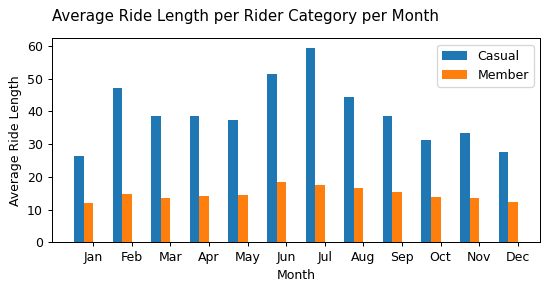

In [48]:
pos = list(range(len(monthly_average_ride_length_df["casual"])))
width = 0.25

fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

plt.bar(pos, monthly_average_ride_length_df["casual"], width)
plt.bar([p + width for p in pos], monthly_average_ride_length_df["member"], width)

# Setting the y and x axis label
ax.set_ylabel("Average Ride Length")
ax.set_xlabel("Month")
# Setting the chart's title
ax.set_title("Average Ride Length per Rider Category per Month", loc="left", pad=14)

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(months)

# Adding the legend and showing the plot
plt.legend(["Casual", "Member"], loc="upper right")
plt.show()

In [49]:
# RIDEABLE TYPE PER RIDER CATEGORY
type_of_bike = clean_df.groupby(["member_casual"])["rideable_type"].value_counts()
print(type_of_bike)


member_casual  rideable_type
casual         docked_bike      1069137
               classic_bike      264398
               electric_bike     241328
member         docked_bike      1258224
               classic_bike      576650
               electric_bike     338969
Name: rideable_type, dtype: int64


In [50]:
week_ride_member=clean_df[clean_df['member_casual'] =='member']
week_ride_casual=clean_df[clean_df['member_casual'] !='member']

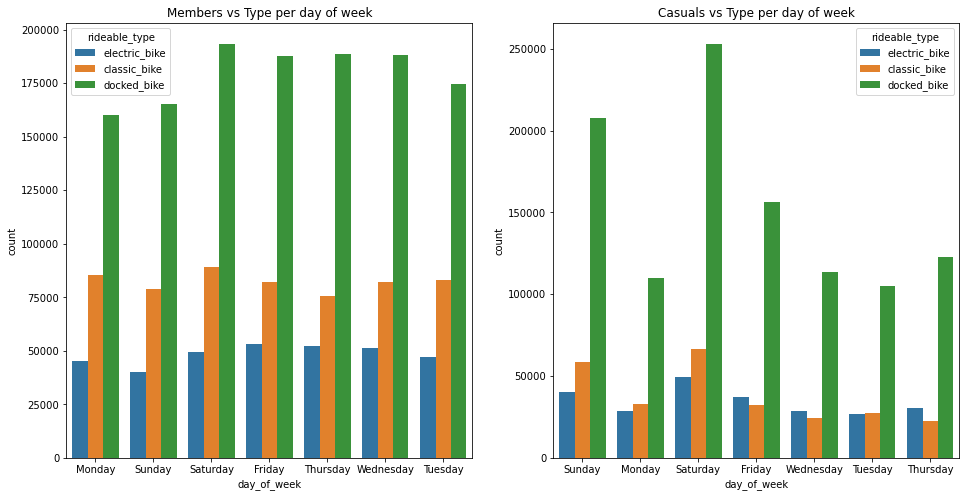

In [51]:
fig,axes=plt.subplots(1,2,figsize=(16,8))
ho=['electric_bike', 'classic_bike', 'docked_bike']
sns.countplot(week_ride_member['day_of_week'],hue=week_ride_member.rideable_type,hue_order=ho,ax=axes[0])
sns.countplot(week_ride_casual['day_of_week'],hue=week_ride_casual.rideable_type,hue_order=ho,ax=axes[1])
axes[0].set_title('Members vs Type per day of week')
axes[1].set_title('Casuals vs Type per day of week')
plt.show()
#Docked bike is the most popular for both members and casuals. But we can see that casuals prefer docked bike more than members do

###  After tons of codes and analysis, it's time to share our results and to answer the question "How can we convert casuals to members?".

### we still have some observations and inferences from our analysis that it's possible to come up with a possible solution. Although, it might not be effective fully. Now, let's summarize what we have observed from our analysis:
1. Member bike usage is quite similar throughout the week except Sunday, which is less than other days. We can infer that members are mostly working people that getting a membership is financially and time wise viable option.
2. Casual usage is slow for weekdays but weekends are very popular especially Saturday.
3. Docked bike is the most popular for both members and casuals. But we can see that casuals prefer docked bike more than members do.
4. The average distance traveled by members and casuals are almost same, however, members average trip duration ~15 min. is almost three times less than casual mean trip duration ~42 min.
5. Most lengthy trips are taken by casuals and they are abnormally long. For instance, top five lengthy trips are 38, 37, 36, 35, 35 days all taken by casuals.
6. All occurrence of the missing data (around 200k) of start and end station names occurred with electric bikes only. In other words, out of total 888224 electric bikes in use, around 200k has missing start or end station name.

### Considering the above observations and insights we can suggest the following:
We see that members take shorter trips to work with bikes during Monday to Saturday, since it is financially viable and fast transportation. However, casuals prefer longer trips especially Saturday and Sunday. Thus:
We could increase the renting price of the bikes for the weekend to target casual users into having a membership especially for docked bikes, since they are preferred more by causal users.
Providing a special service or perks for only members might motivate casual users to have a membership. Services might include free ice cream or lemonade, free tour guide, or fast line for renting without any line etc.